# COCO Dataset Exploration

In this notebook, we:
- Load COCO 2017 annotations
- Visualize a random image
- Generate a binary mask for the "person" category

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image

## Load COCO Annotations

We initialize the COCO API using the training annotation file.

In [2]:
annotation_path = "../data/annotations/instances_train2017.json"

coco = COCO(annotation_path)

print("Total Images:", len(coco.imgs))
print("Total Categories:", len(coco.cats))

loading annotations into memory...
Done (t=12.93s)
creating index...
index created!
Total Images: 118287
Total Categories: 80


## Display Category Names

We check available object categories in the dataset.

In [3]:
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

print(category_names)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


## Visualize a Random Image

We randomly select one image from the dataset and display it.

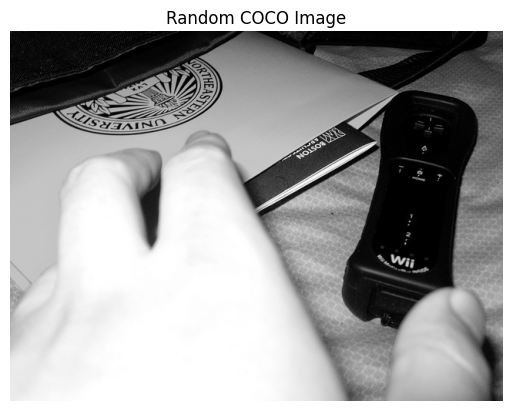

In [4]:
# Select random image
img_id = random.choice(list(coco.imgs.keys()))
img_info = coco.loadImgs(img_id)[0]

img_path = os.path.join("../data/train2017", img_info['file_name'])

image = Image.open(img_path)
plt.imshow(image)
plt.axis('off')
plt.title("Random COCO Image")
plt.show()

## Generate Binary Mask for "Person"

We extract all annotations labeled as "person" and create a binary mask.

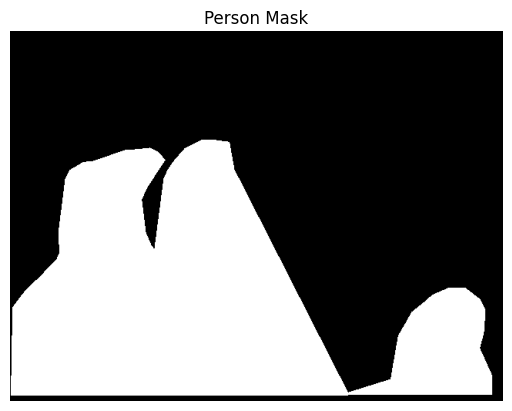

In [5]:
# Get person category id
person_cat_id = coco.getCatIds(catNms=['person'])[0]

# Get annotation ids for this image
ann_ids = coco.getAnnIds(imgIds=img_id, catIds=[person_cat_id], iscrowd=None)

anns = coco.loadAnns(ann_ids)

# Create empty mask
mask = np.zeros((img_info['height'], img_info['width']))

for ann in anns:
    mask += coco.annToMask(ann)

mask = np.clip(mask, 0, 1)

plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Person Mask")
plt.show()